## Introduction to Time Series
- Time Series is generally data which is collected over time and is dependent on it.
- Not every data collected with respect to time represents a time series.

### Example of time series: 

    - Stock Market Price
    - Passenger Count of an airlines
    - Temperature over time 

### Components of a Time Series:
1. `Trend`: Trend is a general direction in which something is developing or changing. 
2. `Seasonality`: Any predictable change or pattern in a time series that recurs or repeats over a specific time period can be said to be seasonality.


#### Difference between time series and regression
- The main difference is that a time series is time dependent. So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
- Along with an increasing or decreasing trend, most Time Series have some form of seasonality trends,i.e. variations specific to a particular time frame.

**Note** 

    - Predicting a time series using regression techniques is not a good approach.
    - Time series forecasting is the use of a model to predict future values based on previously observed values.


## Understanding the Problem Statements and Datasets
### Problem Statement
Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

You can get the dataset here https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

### Table of Contents

a) Understanding Data:

    1) Hypothesis Generation
    2) Getting the system ready and loading the data
    3) Dataset Structure and Content
    4) Feature Extraction
    5) Exploratory Analysis

b) Forecasting using Multiple Modeling Techniques:

    1) Splitting the data into training and validation part
    2) Modeling techniques
    3) Holt’s Linear Trend Model on daily time series
    4) Holt Winter’s Model on daily time series
    5) Introduction to ARIMA model
    6) Parameter tuning for ARIMA model
    7) SARIMAX model on daily time series

## a) Understanding Data

### 1) Hypothesis Generation
Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

- There will be an increase in the traffic as the years pass by.

`Explanation` - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.


- The traffic will be high from May to October.

`Explanation` - Tourist visits generally increases during this time perion.

- Traffic on weekdays will be more as compared to weekends/holidays.

`Explanation` - People will go to office on weekdays and hence the traffic will be more

- Traffic during the peak hours will be high.
'Explanation` - People will travel to work, college.




### 2) Getting the system ready and loading the data

In [4]:
## Load the dataset
# Load the data
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [0]:
##
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [0]:
##
train=pd.read_csv("Train.csv") 
test=pd.read_csv("Test.csv")

train_original=train.copy() 
test_original=test.copy()

### 3) Dataset Structure and Content

In [87]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [88]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


(None, None)

In [89]:
## Shape
train.shape, test.shape

((18288, 3), (5112, 2))

### 4) Feature Extraction

In [0]:
## column "Datetime" need to be change to datetime format
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 

train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 


In [91]:
## check 
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        5112 non-null   int64         
 1   Datetime  5112 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 80.0 KB


(None, None)

In [92]:
### Insight for 2) Hypothesis
for i in (train, test, train_original, test_original):
    i['year'] = i['Datetime'].dt.year 
    i['month'] = i['Datetime'].dt.month 
    i['day'] = i['Datetime'].dt.day
    i['Hour'] = i['Datetime'].dt.hour 
    
## check
train_original.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [0]:
###
train['day of week'] = train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [94]:
## Assign 1 if the day of week is a weekend and 0 if the day of week in not a weekend.
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 

train['weekend'] = train['Datetime'].apply(applyer) 

## check
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [0]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 

In [96]:
# df['Count'] # Count is the passenger count corresponding to each Datetime.
ts = df['Count'] 
print(ts[:10])
print(type(ts))

Datetime
2012-08-25 00:00:00    8
2012-08-25 01:00:00    2
2012-08-25 02:00:00    6
2012-08-25 03:00:00    2
2012-08-25 04:00:00    2
2012-08-25 05:00:00    2
2012-08-25 06:00:00    2
2012-08-25 07:00:00    2
2012-08-25 08:00:00    6
2012-08-25 09:00:00    2
Name: Count, dtype: int64
<class 'pandas.core.series.Series'>


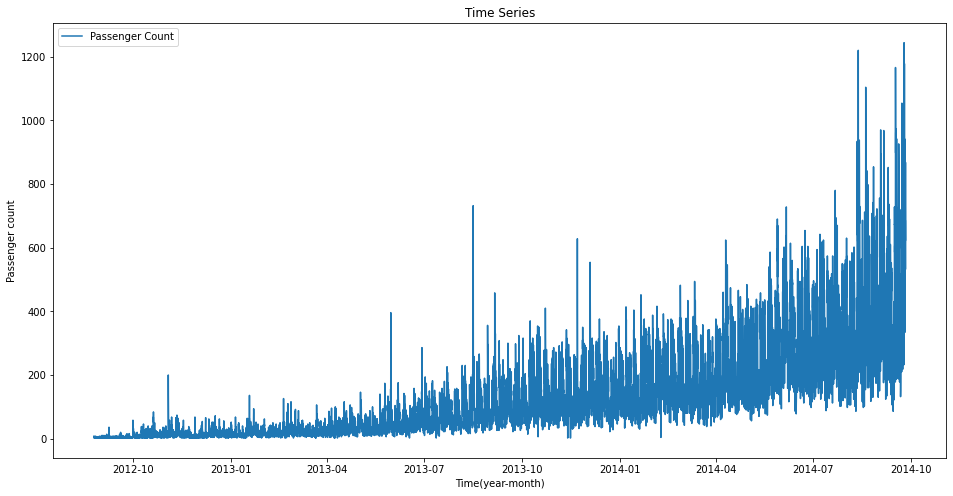

In [97]:

plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

## Note: Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time

### 5) Exploratory Data Analysis

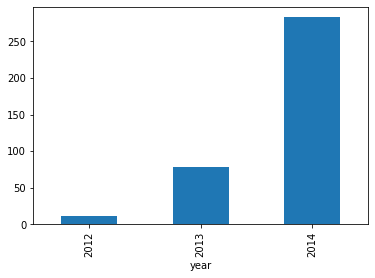

In [98]:
## Our first hypothesis was traffic will increase as the years pass by
train.groupby('year')['Count'].mean().plot.bar()

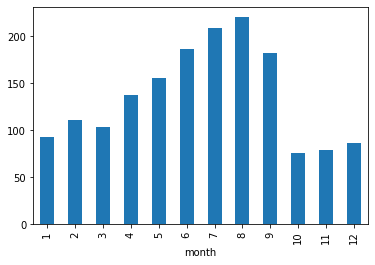

In [99]:
## Our second hypothesis was about increase in traffic from May to October
train.groupby('month')['Count'].mean().plot.bar()

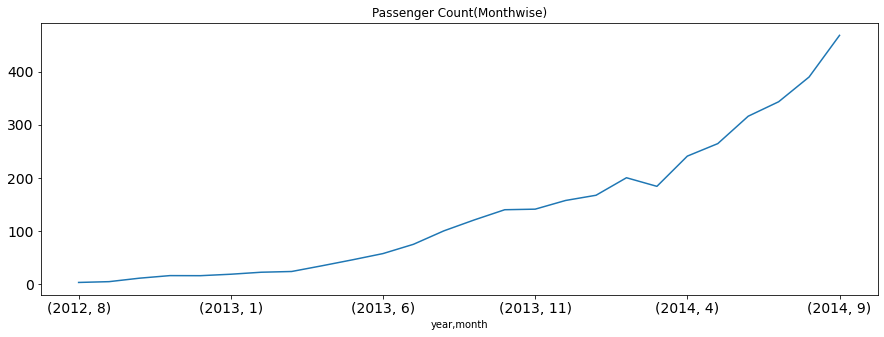

In [100]:
## monthly mean of each year separately
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

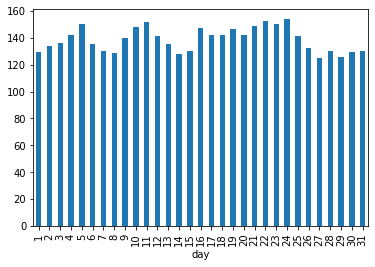

In [101]:
## daily mean of passenger count.
train.groupby('day')['Count'].mean().plot.bar()

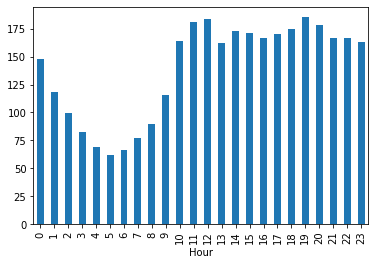

In [102]:
### also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.
train.groupby('Hour')['Count'].mean().plot.bar()

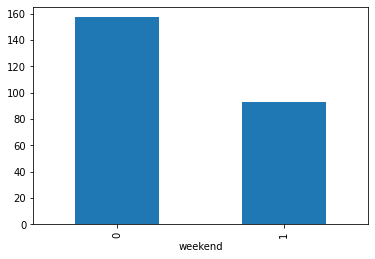

In [103]:
### validate our hypothesis in which we assumed that the traffic will be more on weekdays.
train.groupby('weekend')['Count'].mean().plot.bar()

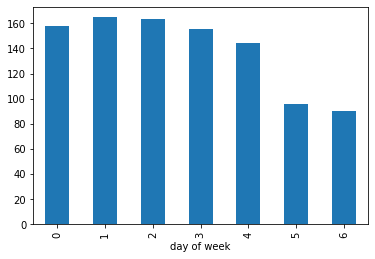

In [104]:
## Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.
train.groupby('day of week')['Count'].mean().plot.bar()

In [105]:
## 
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [0]:
### drop the ID variable 
train = train.drop('ID', axis = 1)

In [107]:
train['Timestamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M') 
train.index = train['Timestamp']

## check
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,Timestamp
Timestamp,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,2012-08-25 00:00:00
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,2012-08-25 01:00:00
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,2012-08-25 02:00:00
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,2012-08-25 03:00:00
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,2012-08-25 04:00:00


In [0]:
##
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()
# monthly

In [0]:
# hourly['Count']

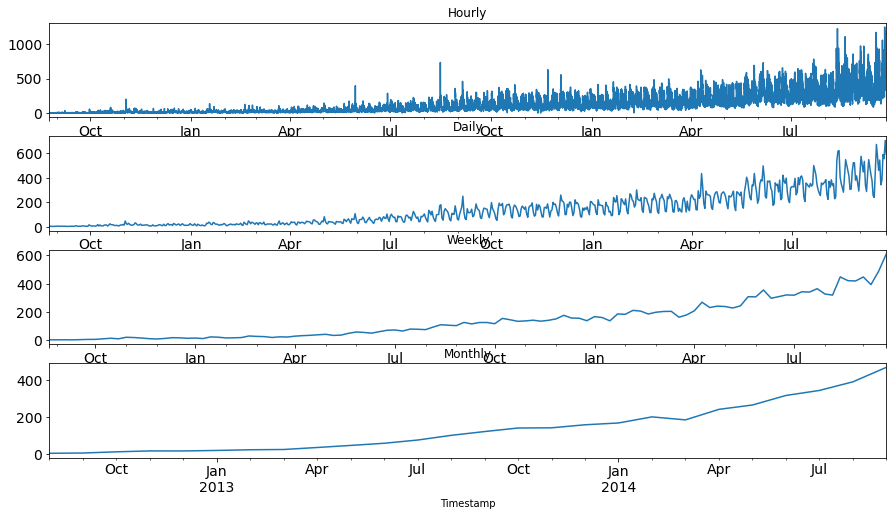

In [110]:
fig, axs = plt.subplots(4,1) 
hourly['Count'].plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily['Count'].plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly['Count'].plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly['Count'].plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [111]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,Timestamp
Timestamp,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,2012-08-25 00:00:00
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,2012-08-25 01:00:00
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,2012-08-25 02:00:00
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,2012-08-25 03:00:00
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,2012-08-25 04:00:00


In [112]:
### we will work on the daily time series.
test['Timestamp'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M') 
test.index = test['Timestamp']  

# Converting to daily mean 
test = test.resample('D').mean() 

train['Timestamp'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train['Timestamp']

# Converting to daily mean 
train = train.resample('D').mean()
train.head()

,Count,year,month,day,Hour,day of week,weekend
Timestamp,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [113]:
test.head()

,ID,year,month,day,Hour
Timestamp,,,,,
2014-09-26,18299.5,2014.0,9.0,26.0,11.5
2014-09-27,18323.5,2014.0,9.0,27.0,11.5
2014-09-28,18347.5,2014.0,9.0,28.0,11.5
2014-09-29,18371.5,2014.0,9.0,29.0,11.5
2014-09-30,18395.5,2014.0,9.0,30.0,11.5


## b) Forecasting using Multiple Modeling Techniques:

### 1) Splitting the train data into training and validation part
To divide the data into training and validation set, we will take last 3 months as the validation data and rest for training data. We will take only 3 months as the trend will be the most in them. If we take more than 3 months for the validation set, our training set will have less data points as the total duration is of 25 months. So, it will be a good choice to take 3 months for validation set.

The starting date of the dataset is 25-08-2012 as we have seen in the exploration part and the end date is 25-09-2014.

In [0]:
Train=train.loc['2012-08-25':'2014-06-24'] 
valid=train.loc['2014-06-25':'2014-09-25']

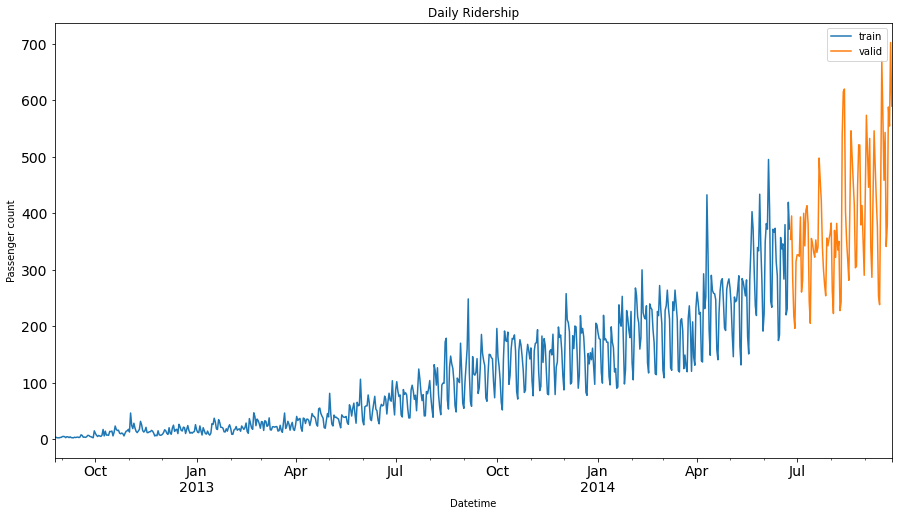

In [120]:
Train['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid['Count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

### 2) Modeling Techniques
    i) Naive Approach
    ii) Moving Average
    iii) Simple Exponential Smoothing
    iv) Holt’s Linear Trend Model



#### i) Naive Approach
In this forecasting technique, we assume that the next expected point is equal to the last observed point. So we can expect a straight horizontal line as the prediction.

372.1666666666667


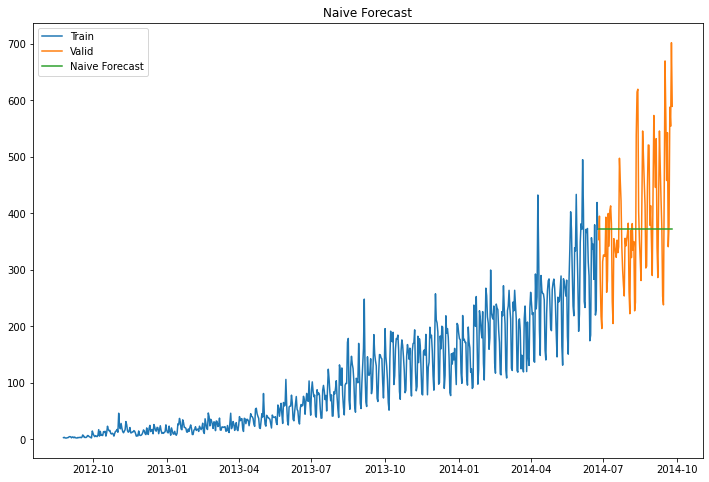

In [130]:
dd = np.asarray(Train['Count'])
y_hat = valid.copy() 

print(dd[len(dd) - 1])
y_hat['naive'] = dd[len(dd)-1] 


plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train') 
plt.plot(valid.index, valid['Count'], label='Valid') 
plt.plot(y_hat.index, y_hat['naive'], label='Naive Forecast') 
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

In [131]:
### calculate RMSE to check the accuracy of our model on validation data set.

from sklearn.metrics import mean_squared_error 
from math import sqrt 
rms = sqrt(mean_squared_error(valid.Count, y_hat.naive)) 
print(rms)

111.79050467496724


### ii) Moving Average
In this technique we will take the average of the passenger counts for last few time periods only.

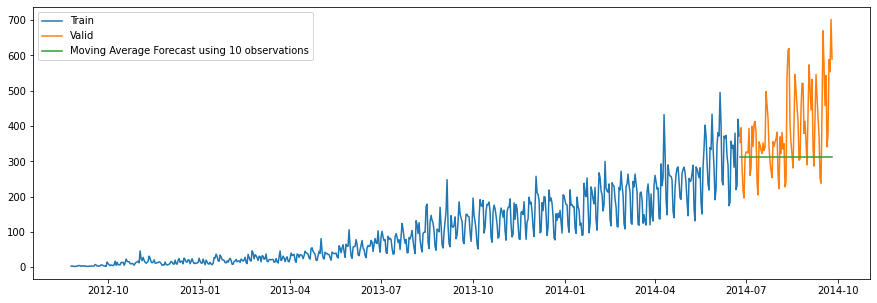

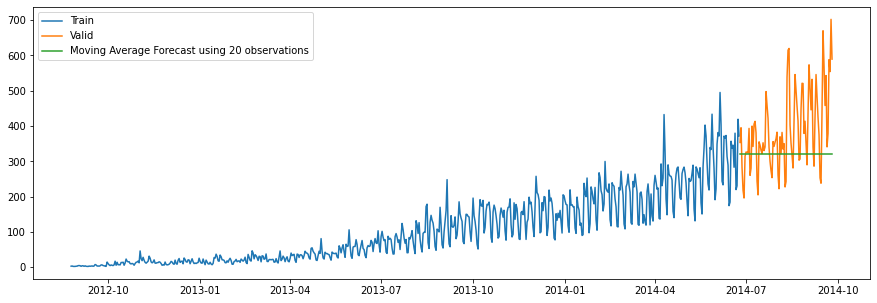

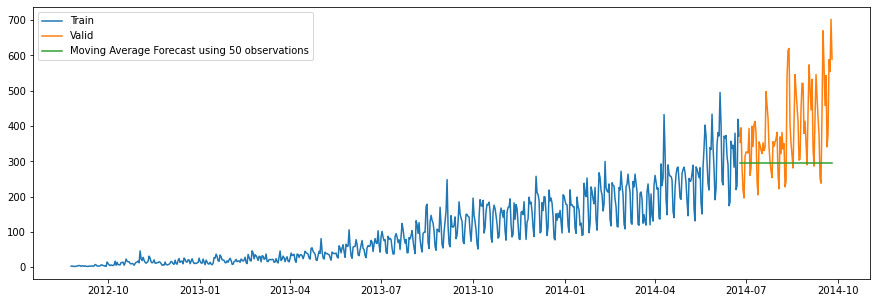

In [132]:
y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations') 
plt.legend(loc='best') 
plt.show() 

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations') 
plt.legend(loc='best') 
plt.show() 

y_hat_avg = valid.copy() 
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations') 
plt.legend(loc='best') 
plt.show()

In [133]:
rms = sqrt(mean_squared_error(valid['Count'], y_hat_avg['moving_avg_forecast'])) 
print(rms)

144.19175679986802


#### iii) Simple Exponential Smoothing
- In this technique, we assign larger weights to more recent observations than to observations from the distant past.
- The weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations.

NOTE - If we give the entire weight to the last observed value only, this method will be similar to the naive approach. So, we can say that naive approach is also a simple exponential smoothing technique where the entire weight is given to the last observed value.

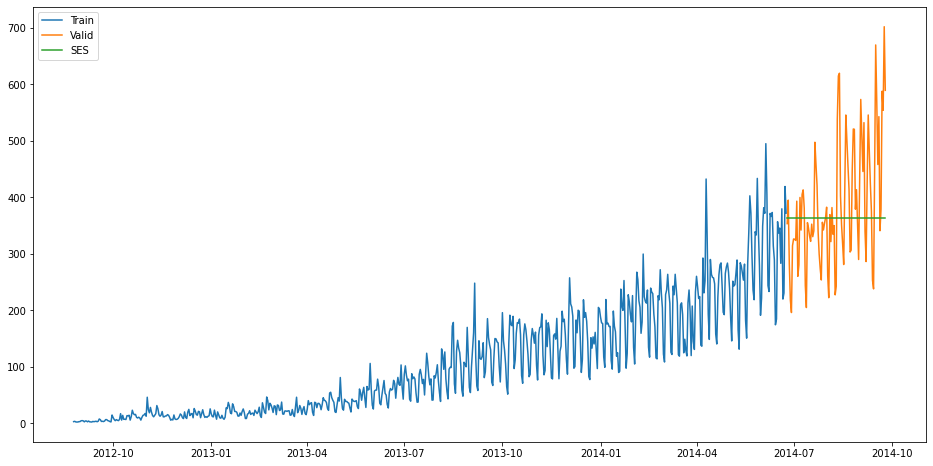

In [135]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

y_hat_avg = valid.copy() 
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
plt.show()

In [136]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES)) 
print(rms)

113.43708111884514


#### iv) Holt’s Linear Trend Model

- It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
- This method takes into account the trend of the dataset. The forecast function in this method is a function of level and trend.

We can decompose the time series in four parts.

    - `Observed`, which is the original time series.
    - `Trend`, which shows the trend in the time series, i.e., increasing or decreasing behaviour of the time series.
    - `Seasonal`, which tells us about the seasonality in the time series.
    - `Residual`, which is obtained by removing any trend or seasonality in the time series.